In [1]:
import geemap, ee
import geemap.foliumap as geemap
import seaborn as sns
import matplotlib.pyplot as plt

try: 
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

setting initial map parameters for Albay, Bicol 

In [2]:
center_lat = 13.1775
center_lon = 123.5280
zoom_level = 10

Initializing first map

In [3]:
map1 = geemap.Map(center = [center_lat, center_lon], zoom = zoom_level)
map1.addLayerControl()
map1

Getting DMSP-OLS image ID for 1992
Note: ImageCollections are collections (like a time series) of images. Meanwhile, images are what Google Earth Engine uses to describe raster files. 

More on ImageCollections:
- a class in the Google Earth Engine Python API that represents a collection of images. An image collection is a sequence of images, where each image typically represents some kind of remote sensing data (such as satellite imagery).

- can be created in Earth Engine by querying the available images for a given time period and location. Image collections can be filtered, sorted, and processed using Earth Engine functions to create new images, perform analysis, or generate visualizations.

- ee.ImageCollection class has many methods that allow users to manipulate and analyze collections of images. For example, the filterDate() method can be used to filter an image collection by date, and the mosaic() method can be used to create a single image from a collection of images by taking the pixel with the highest value at each location.



On Image:
- ee.Image is a class in the Google Earth Engine Python API that represents a single image. An image in Earth Engine is typically a multi-band raster dataset, representing some kind of remote sensing data (such as satellite imagery).

- An ee.Image can be created in Earth Engine by querying a specific image or by processing existing images or collections of images using Earth Engine functions. Images can be filtered, sorted, and processed to create new images, perform analysis, or generate visualizations.

- The ee.Image class has many methods that allow users to manipulate and analyze images. For example, the clip() method can be used to clip an image to a specific geometry, and the select() method can be used to select specific bands from an image.

In [4]:
# setting the variable for DMSP 1992 ID 
dmsp13id = "NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182013"

#creating an ee object for the 2018 image 
dmsp13 = ee.Image(dmsp13id)
Map2 = geemap.Map(center = [center_lat, center_lon], zoom= zoom_level)
Map2.addLayer(dmsp13, name = "DMSP NTL 2018")

Map2.addLayerControl()
Map2

Adjusting opacity for the NTL layer

In [5]:
Map3 = geemap.Map(center = [center_lat, center_lon], zoom = zoom_level)
Map3.addLayer(dmsp13, name = "DMSP NTL 2013", opacity= 0.75)
Map3.addLayerControl()
Map3


Creating a mask to clean the image. This filters out the zero or negative values. 

 - .mask() method is used to set a mask on an image or an image band. A mask is a binary image with the same dimensions as the input image or band, where each pixel is either 0 or 1. When an image or band is masked, the pixels in the image or band that correspond to 0 values in the mask are set to a special NoData value, which indicates that the pixel should be excluded from analysis.

 - The .mask() method takes a single argument, which is the mask to be applied. The mask can be an image, an image band, or a constant value. The mask should have the same dimensions and spatial resolution as the input image or band.

In [6]:
Map4 = geemap.Map(center = [center_lat, center_lon], zoom = zoom_level)
Map4.addLayer(dmsp13.mask(dmsp13), name = 'DMSP NTL 2013 masked', opacity = 0.75)
Map4.addLayerControl()
Map4

Changing the basemap. 

In [7]:
Map5 = geemap.Map(center = [center_lat, center_lon], zoom = zoom_level)
Map5.add_basemap('Esri.NatGeoWorldMap')
Map5.addLayer(dmsp13.mask(dmsp13), name = 'DMSP NTL 2013 masker', opacity =0.75)
Map5.addLayerControl()
Map5

Creating a split panel view for DMSP-OLS data. 2000 and 2013 comparison. 

- ee_tile_layer is a method in the geemap Python package that allows you to create a tile layer from an Earth Engine object and add it to a geemap.Map object.

- The ee_tile_layer() method takes an Earth Engine object, such as an ee.Image or ee.ImageCollection, and optional parameters such as the visualization parameters and attribution text, and returns a TileLayer object that can be added to a geemap.Map object using the Map.add_tile_layer() method.

What is a tile layer? 
- A tile layer is a type of map layer that is composed of small rectangular images, called tiles, that are arranged in a grid pattern to cover a geographic area. Each tile typically contains a portion of the map or imagery data and is designed to be displayed seamlessly with adjacent tiles.

- Tile layers are commonly used in web mapping applications, as they allow for fast and efficient rendering of large datasets over the internet. Instead of loading the entire map or image at once, the application loads only the tiles that are necessary to display the current view. This results in faster load times and smoother navigation for the user.

- Tile layers can be served from various sources, such as online map providers like Google Maps or OpenStreetMap, or custom tile servers that serve map or imagery data hosted on local or remote servers. Tile layers can also be created from Earth Engine imagery using the ee_tile_layer() method in the geemap Python package.

In [8]:
dmsp00id = "NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152000"
dmsp00 = ee.Image(dmsp00id)

#adding the tiles
#{} indicate that there are no visualization parameters specified for the tile layer.
dmsp13_tile = geemap.ee_tile_layer(dmsp13.mask(dmsp13), {}, 'DMSP NTL 2013', opacity = 0.75) 
dmsp00_tile = geemap.ee_tile_layer(dmsp00.mask(dmsp00), {}, 'DMSP NTL 2000', opacity = 0.75)

#mapping it all out 
Map7 = geemap.Map(center = [center_lat, center_lon], zoom = zoom_level)
Map7.split_map(left_layer = dmsp00_tile, right_layer = dmsp13_tile)
Map7.addLayerControl()
Map7


Loading and inspecting the DMSP-OLS nighttime lights Image Collection 

In [9]:
dmsp = ee.ImageCollection('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS') # total number of image collection spans from 1992 to 2013, 
# but some years contain multiple images due to satellite overlap

In [10]:
# information on the dmsp size. 
print(dmsp.size().getInfo())

35


In Google Earth Engine (GEE), a reducer is a function that aggregates data over a specified spatial and temporal scale. A reducer takes a collection of data, such as an ee.ImageCollection or ee.FeatureCollection, and returns a single value or image representing a summary of the data within the specified scale.

There are many reducers available in GEE, each designed to perform a different type of aggregation. Some of the most commonly used reducers include:

- ee.Reducer.mean(): computes the mean value of the input data.
- ee.Reducer.median(): computes the median value of the input data.
- ee.Reducer.sum(): computes the sum of the input data.
- ee.Reducer.min(): finds the minimum value of the input data.
- ee.Reducer.max(): finds the maximum value of the input data.
- ee.Reducer.minMax() is a reducer function in Google Earth Engine that computes the minimum and maximum values of a given input data. It returns an ee.Dictionary object with two keys: "min" and "max", each representing the minimum and maximum values of the input data, respectively.



Reducers can be applied to image or feature collections using the reduce() method. The reduce() method takes a reducer function as input and returns the result of the reduction.

- .reduceColumns() is a function in Google Earth Engine that aggregates a table (an ee.FeatureCollection) based on a specified reducer, returning a new table with the aggregated results.

In the code snippet provided, .reduceColumns(ee.Reducer.minMax(), ['system:time_start']) applies the ee.Reducer.minMax() reducer to the specified column of the input table. Specifically, it computes the minimum and maximum values of the system:time_start column of the input feature collection.

Other information:
- .getInfo() is a function in Google Earth Engine that retrieves the value of an object on the server and returns it as a client-side object in Python. When working with Earth Engine, many operations are performed on the server side, which means that the data and results remain on the server until you explicitly request them. To retrieve the value of an object from the server and use it in your Python environment, you can use the .getInfo() function.

In Google Earth Engine, ee.Date() is a constructor for creating date objects that can be used in Earth Engine computations. In the code snippet you provided, ee.Date(imgrange.get('min')) creates a date object from the minimum value of the system:time_start column of a feature collection, imgrange.

The .get('min') function retrieves the minimum value of the system:time_start column from the feature collection imgrange. This value is then passed as an argument to ee.Date(), creating a new date object.

The .getInfo() function is then used to retrieve the client-side value of this date object as a Python dictionary, and the ['value'] key is used to access the value of the date object as a Unix timestamp (i.e., the number of milliseconds since January 1, 1970, 00:00:00 UTC).

So the overall meaning of ee.Date(imgrange.get('min')).getInfo()['value'] is to retrieve the minimum value of the system:time_start column of a feature collection imgrange, convert it to a date object, and return the value of the date object as a Unix timestamp. This can be useful for further analysis or visualization in Python.

In [11]:
imgrange = dmsp.reduceColumns(ee.Reducer.minMax(), ["system:time_start"])
start = ee.Date(imgrange.get('min')).getInfo()['value']
end = ee.Date(imgrange.get('max')).getInfo()['value']
print(f"Date range: {start, end}")

#Date Conversions 
from datetime import datetime 
start = datetime.utcfromtimestamp(start/1000).strftime('%Y-%m-%d %H:%M:%S')
end = datetime.utcfromtimestamp(end/1000).strftime('%Y-%m-%d %H:%M:%S')
print(f"Date range: {start,end}")

Date range: (694224000000, 1356998400000)
Date range: ('1992-01-01 00:00:00', '2013-01-01 00:00:00')


In [12]:
#function if will be run more than once
def get_date_range(img_collection):
    imgrange = img_collection.reduceColumns(ee.Reducer.minMax(),["system:time_start"])
    start = ee.Date(imgrange.get('min')).getInfo()['value']
    end = ee.Date(imgrange.get('max')).getInfo()['value']
    
    start = datetime.utcfromtimestamp(start/1000).strftime('%Y-%m-%d %H:%M:%S')
    end = datetime.utcfromtimestamp(end/1000).strftime('%Y-%m-%d %H:%M:%S')
    print(f"Date range: {start,end}")

Getting DMSP-OLS annual composite for 2010

In [13]:
dmsp2010 = ee.Image("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182010")

Map8 = geemap.Map(center= [center_lat, center_lon], zoom = zoom_level)
Map8.add_basemap('SATELLITE')
Map8.addLayer(dmsp2010.mask(dmsp2010), {}, "DMSP-OLS 2010", opacity = 0.75)
Map8.addLayerControl()
Map8

In [14]:

# adding another map layer
dmsp2002 = ee.Image("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152002")
Map9 = geemap.Map(center = [center_lat, center_lon], zoom = zoom_level)
Map9.add_basemap('SATELLITE')
Map9.addLayer(dmsp2002.mask(dmsp2002), {}, "DMSP-OLS 2002", opacity = 0.75)

#generating tile layers
dmsp2010_tile = geemap.ee_tile_layer(dmsp2010.mask(dmsp2010), {}, "DMSP-OLS 2010", opacity = 0.75)
dmsp2002_tile = geemap.ee_tile_layer(dmsp2002.mask(dmsp2002), {}, "DMSP-OLS 2002", opacity = 0.75)

#creating split map 
Map9.split_map(left_layer = dmsp2002_tile, right_layer = dmsp2010_tile)
Map9

**Image Clipping with VIIRS-DNB**
Here, we clip a particular satellite raster file to a specific AOI, including a geometry from a geopolitical boundary. We will also apply this clipping to an entire ImageCollection. 

In [15]:
# getting the December image of VIIRS using the "avg_band" band
# code creates a single Image object representing the median composite of VIIRS DNB data for December 2019
viirs2019_12 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2019-12-01", "2019-12-31").select('avg_rad').median()

#Initializing the map 
Map10 = geemap.Map(center = [center_lat, center_lon], zoom = zoom_level)
Map10.add_basemap('SATELLITE')
Map10.addLayer(viirs2019_12, {}, "VIIRS-DNB December 2019")

Map10.addLayerControl()
Map10

Clipping image to an area around Legazpi City, Albay

In [16]:
#creates an Earth Engine Geometry object representing a circular AOI with a diameter of 400 meters centered
# at the specified latitude and longitude.
leg_lat = 13.1391
leg_lon = 123.7438
#Geometry.Point creates an Earth Engine Point object representing the center point of the AOI
#.buffer(200) method creates a circular buffer around the center point with a radius of 200 meters
aoi = ee.Geometry.Point([leg_lon, leg_lat]).buffer(30000); 


# clipping the VIIRS image to the AOI and adding that layer by passing AOI object to the .clip() function
# used to clip an image or an image collection to a specified geometry. 
#The geometry can be a point, a line, a polygon, or any other valid Earth Engine geometry object.
viirs2019_12_clipped = viirs2019_12.clip(aoi)

Map11 = geemap.Map(center= [leg_lat, leg_lon], zoom = 10)
Map11.add_basemap('SATELLITE')
Map11.addLayer(viirs2019_12_clipped, {}, "VIIRS-DNB- Legazpi City Albay 2019")
Map11.addLayerControl()
Map11


**Clipping an image to a geopolitical boundary**

Importing shapefiles with geemap

In [17]:
path = '/Users/jonabeleleanorbaldres/Desktop/municipality.txt' 
#does not work since the input shapefile is invalid. 
#the path should be in the format of .shp
#can be done by converting the txt file into .shp format through QGIS or ARCGIS
#after that we can get the geometry just like what we did with aoi from above. 
ee_object = geemap.shp_to_ee(path)

The input shapefile is invalid.


In [18]:
#retrieving the geometry of Albay
#Note that in https://data.apps.fao.org/catalog/dataset/gadm36-code-list-global-admin-2/resource/e900f155-86a0-4588-9295-ff3bc0ffcdcd
#the shapefile for municapalities and cities are already available 
aoi_leg = ee.FeatureCollection("FAO/GAUL/2015/level2").filter(ee.Filter.eq('ADM2_NAME', 'Albay'))

In [19]:
viirs2019_12_clipped = viirs2019_12.clip(aoi_leg)

Map12 = geemap.Map(center = [leg_lat, leg_lon], zoom = 10)
Map12.add_basemap("SATELLITE")
Map12.addLayer(viirs2019_12_clipped, {}, 'VIIRS-DNB- Legazpi December 2019')
Map12.addLayerControl()
Map12


Clipping an entire ImageCollection to Albay. 
- This helps if we want to create time series analysis of our focus area.

In [20]:
#getting the entire VIIRS-DNB selection but only selecting the avg_rad band
viirsDNB = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").select('avg_rad')

#function for clipping

def clip_func(x,aoi):
    return x.clip(aoi)

# using lambda function to clip
viirs_leg = viirsDNB.map(lambda x: x.clip(aoi_leg))

In [21]:
viirs_leg_2015_06 = viirs_leg.filterDate('2015-06-01', '2015-06-30').median()
viirs_leg_2019_06 = viirs_leg.filterDate('2019-06-01', '2019-06-30').median()

Map13 = geemap.Map(center = [leg_lat, leg_lon], zoom = 10)
Map13.add_basemap('SATELLITE')
Map13.addLayer(viirs_leg_2015_06, {}, "VIIRS DNB Legazpi June 2015")
Map13.addLayer(viirs_leg_2019_06, {}, "VIIRS DNB Legazpi June 2019")
Map13.addLayerControl()
Map13

Getting the annual composite of Albay for all of 2017, by reducing the image collection through the .median() function. 

In [22]:
viirs_leg_2017 = viirs_leg.filterDate('2017-01-01', '2017-12-31').median()

Map14 = geemap.Map(center = [leg_lat, leg_lon], zoom = 10)
Map14.add_basemap('SATELLITE')
Map14.addLayer(viirs_leg_2017, {}, "VIIRS DNB Legazpi City 2017 Median")
Map14.addLayerControl()
Map14

Creating a mask for VIIRS-DNB image using a conditional operation

In [23]:
viirs2014_12 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2014-01-01", "2014-12-31").select('avg_rad').median()

Map15 = geemap.Map(center= [leg_lat, leg_lon], zoom = 10)
Map15.add_basemap("SATELLITE")
Map15.addLayer(viirs2014_12.mask(viirs2014_12), {}, "VIIRS-DNB Dec 2014")
Map15.addLayerControl()
Map15

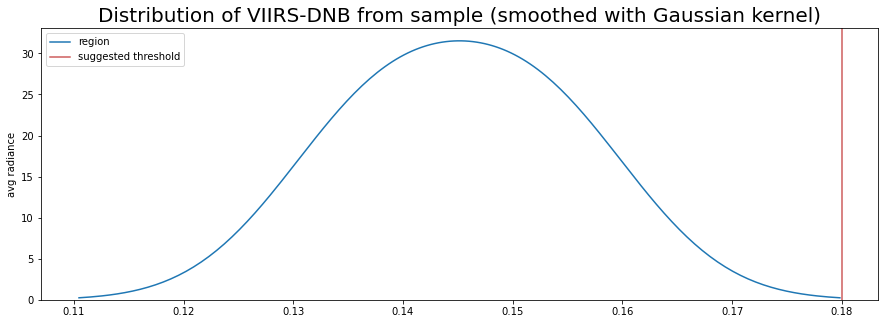

In [24]:
aoi = ee.Geometry.Point([leg_lat,leg_lon]).buffer(20000)

arr = geemap.ee_to_numpy(viirs2014_12, region = aoi)

#creating a histogram
fig,ax = plt.subplots(figsize = (15,5))
sns.kdeplot(arr.flatten(), label = 'region', legend = True, ax = ax)
ax.axvline(0.18, color = 'indianred', label = 'suggested threshold')
plt.legend(fontsize = 20)
plt.title("Distribution of VIIRS-DNB from sample (smoothed with Gaussian kernel)", fontsize =20);
plt.ylabel('avg radiance')
plt.legend();

In [25]:
# from the histogram, it might be interesting to mask all values that are not greater than or equal to 4. 
viirs2014_12_mask = viirs2014_12.gte(0.18)


Map16 = geemap.Map(center = [leg_lat, leg_lon], zoom = 10)
Map16.add_basemap('SATELLITE')
Map16.addLayer(viirs2014_12_mask.mask(viirs2014_12_mask), {}, "Avg rad >= 4")
Map16.addLayerControl
Map16

Note that we can create a map of zones based on chained boolean masks via the syntax:

variable = x.gt(n).add(y.gt(n_1)).add(z.gt(n_2))


**Cell Statistics and Basic Band Math**
- calculating per-pixel and per-band statistics with mathematical operations. 

Overview of the tasks:
1. Clip a scene of 2017 median VIIRS-DNB to Pasig City 
2. Brief overview of scaling
3. Use the Reduce region to get the mean and standard deviation of the Image
4. Create a cleaned layer. 

Clipping a scene of 2017 VIIRS-DNB for Timor-Leste

In [26]:
viirs2017_12 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2017-12-01","2017-12-31").select('avg_rad').first()